Accuracy of the Decision Tree Classifier: 0.71


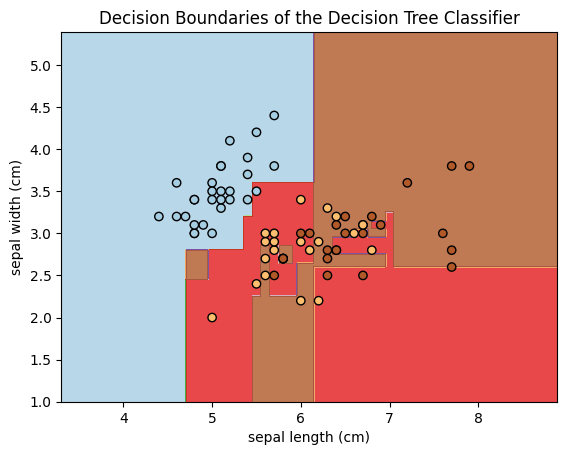

In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()

# Use only the first two features (sepal length and sepal width)
X = iris.data[:, :2]
y = iris.target

# Split the dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the Decision Tree Classifier: {accuracy:.2f}")

# Plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training points
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Decision Boundaries of the Decision Tree Classifier")
plt.show()

For tree depth 1, accuracy is 0.64
For tree depth 2, accuracy is 0.77
For tree depth 3, accuracy is 0.79
For tree depth 4, accuracy is 0.77
For tree depth 5, accuracy is 0.77
For tree depth 6, accuracy is 0.77
For tree depth 7, accuracy is 0.73
For tree depth 8, accuracy is 0.73
For tree depth 9, accuracy is 0.73
For tree depth 10, accuracy is 0.72
Best depth: 3
Best accuracy: 0.79


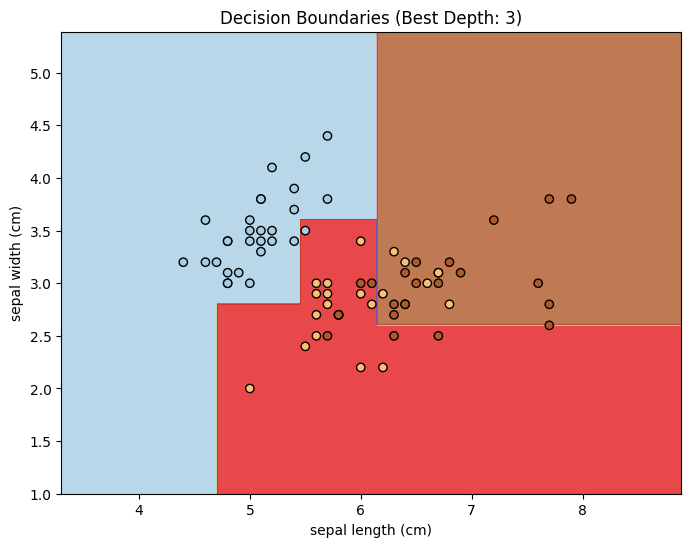

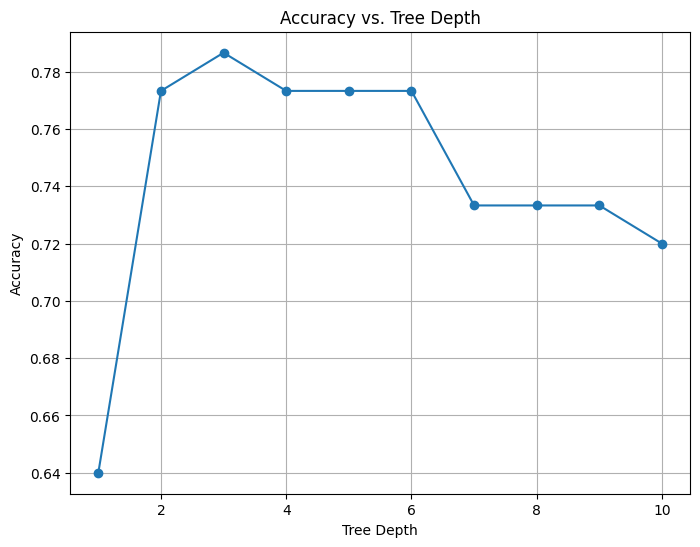

In [15]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()

# Use only the first two features (sepal length and sepal width)
X = iris.data[:, :2]
y = iris.target

# Split the data into training (50%) and testing (50%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Experiment with different depths and find the best one
best_accuracy = 0
best_depth = None
accuracies = []

for depth in range(1, 11):  # Experiment with depths from 1 to 10
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print("For tree depth {}, accuracy is {:.2f}".format(depth, accuracy))
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

print(f"Best depth: {best_depth}")
print(f"Best accuracy: {best_accuracy:.2f}")

# Train the classifier with the best depth
best_clf = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_clf.fit(X_train, y_train)

# Plot decision boundaries for the best depth
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the grid
Z = best_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f"Decision Boundaries (Best Depth: {best_depth})")
plt.show()

# Plot accuracy vs. depth
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), accuracies, marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Tree Depth')
plt.grid()
plt.show()


For tree depth 1, accuracy is 0.72
For tree depth 2, accuracy is 0.83
For tree depth 3, accuracy is 0.79
For tree depth 4, accuracy is 0.76
For tree depth 5, accuracy is 0.80
For tree depth 6, accuracy is 0.76
For tree depth 7, accuracy is 0.76
For tree depth 8, accuracy is 0.75
For tree depth 9, accuracy is 0.75
For tree depth 10, accuracy is 0.75
Best depth for Random Forest: 2
Best accuracy for Random Forest: 0.83


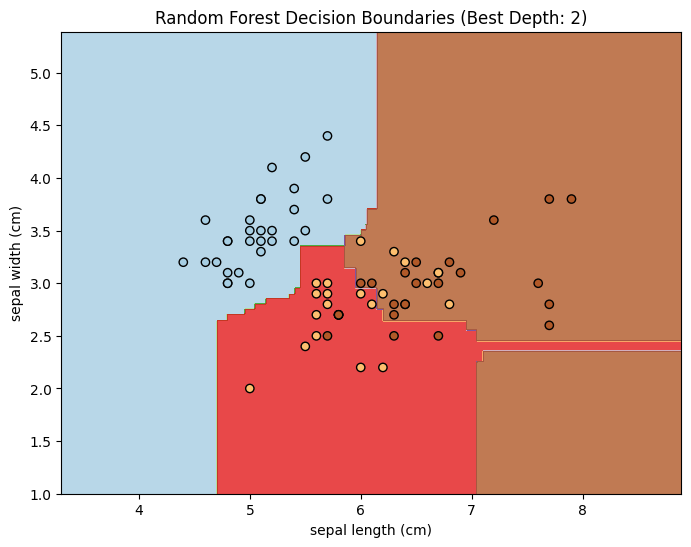

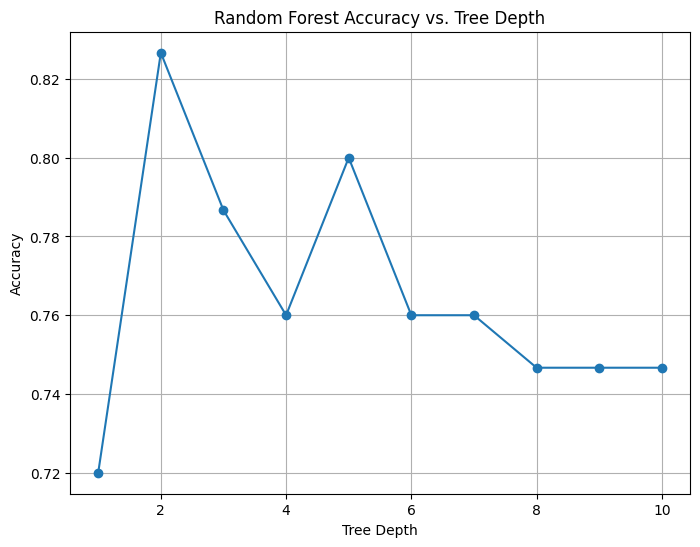

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Use the same train-test split from the previous part
X_train_A = X_train  # Subset A (50% used for training)
X_test_A = X_test
y_train_A = y_train
y_test_A = y_test

# Experiment with different depths for the Random Forest
best_accuracy_rf = 0
best_depth_rf = None
accuracies_rf = []

# Train Random Forest with different max depths
for depth in range(1, 11):  # Experiment with depths from 1 to 10
    rf_clf = RandomForestClassifier(
        n_estimators=100,  # 100 decision trees
        max_depth=depth,   # Depth of trees
        bootstrap=True,    # Bootstrap sampling
        random_state=42
    )
    rf_clf.fit(X_train_A, y_train_A)
    y_pred_rf = rf_clf.predict(X_test_A)
    accuracy_rf = accuracy_score(y_test_A, y_pred_rf)
    accuracies_rf.append(accuracy_rf)
    print("For tree depth {}, accuracy is {:.2f}".format(depth, accuracy_rf))
    if accuracy_rf > best_accuracy_rf:
        best_accuracy_rf = accuracy_rf
        best_depth_rf = depth

print(f"Best depth for Random Forest: {best_depth_rf}")
print(f"Best accuracy for Random Forest: {best_accuracy_rf:.2f}")

# Train the best Random Forest model
best_rf_clf = RandomForestClassifier(
    n_estimators=100, max_depth=best_depth_rf, bootstrap=True, random_state=42
)
best_rf_clf.fit(X_train_A, y_train_A)

# Plot decision boundaries for the best-performing Random Forest model
Z_rf = best_rf_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rf = Z_rf.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_rf, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_test_A[:, 0], X_test_A[:, 1], c=y_test_A, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f"Random Forest Decision Boundaries (Best Depth: {best_depth_rf})")
plt.show()

# Plot Random Forest accuracy vs. depth
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), accuracies_rf, marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Tree Depth')
plt.grid()
plt.show()
